In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import kurtosis, skew

In [52]:
# load the data
path =r"D:\FIA\FIA\linear_regression\apartmentComplexData.csv"
price_data = pd.read_csv(path)

# print the first five rows
price_data.head()

,column1,column2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,column8,medianCompexValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [53]:
# check the data types, in this case everything looks fine no changes need to be made.
price_data.dtypes

column1               float64
column2               float64
complexAge            float64
totalRooms            float64
totalBedrooms         float64
complexInhabitants    float64
apartmentsNr          float64
column8               float64
medianCompexValue     float64
dtype: object

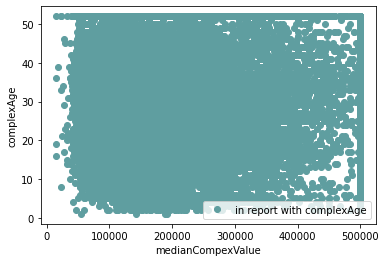

In [54]:
# define the x & y data.
medianCompexValue = price_data['medianCompexValue']
complexAge = price_data['complexAge']
totalRooms = price_data['totalRooms']
totalBedrooms = price_data['totalBedrooms']
complexInhabitants = price_data['complexInhabitants']
apartmentsNr = price_data['apartmentsNr']

# create the scatter plot.
plt.plot(medianCompexValue, complexAge, 'o', color ='cadetblue', label = 'in report with complexAge')

# make sure it's formatted.

plt.xlabel("medianCompexValue")
plt.ylabel("complexAge")
plt.legend()

plt.show()

In [55]:
# let's measure that correlation
price_data.corr()

,column1,column2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,column8,medianCompexValue
column1,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
column2,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
complexAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
complexInhabitants,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
apartmentsNr,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
column8,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianCompexValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


In [56]:
# let's take a look at a statistical summary.
price_data.describe()

,column1,column2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,column8,medianCompexValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'column1'}>,
        <AxesSubplot:title={'center':'column2'}>,
        <AxesSubplot:title={'center':'complexAge'}>],
       [<AxesSubplot:title={'center':'totalRooms'}>,
        <AxesSubplot:title={'center':'totalBedrooms'}>,
        <AxesSubplot:title={'center':'complexInhabitants'}>],
       [<AxesSubplot:title={'center':'apartmentsNr'}>,
        <AxesSubplot:title={'center':'column8'}>,
        <AxesSubplot:title={'center':'medianCompexValue'}>]], dtype=object)

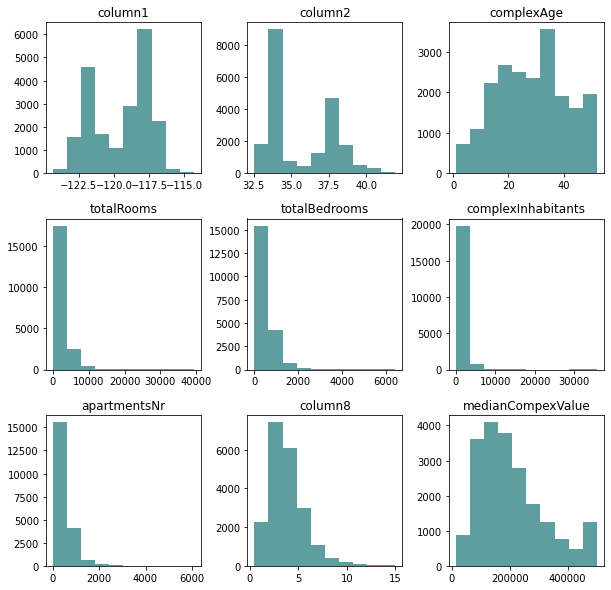

In [57]:
# checking Outliers and Skewness
price_data.hist(grid = False, color = 'cadetblue', figsize=(10,10))

In [58]:
# calculate the excess kurtosis using the fisher method. The alternative is Pearson which calculates regular kurtosis.
complexAge_kurtosis = kurtosis(price_data['complexAge'], fisher = True)
totalRooms_kurtosis = kurtosis(price_data['totalRooms'], fisher = True)
totalBedrooms_kurtosis = kurtosis(price_data['totalBedrooms'], fisher = True)
complexInhabitants_kurtosis = kurtosis(price_data['complexInhabitants'], fisher = True)
apartmentsNr_kurtosis = kurtosis(price_data['apartmentsNr'], fisher = True)
medianCompexValue_kurtosis = kurtosis(price_data['medianCompexValue'], fisher = True)
# calculate the skewness
complexAge_skew = skew(price_data['complexAge'])
totalRooms_skew = skew(price_data['totalRooms'])
totalBedrooms_skew = skew(price_data['totalBedrooms'])
complexInhabitants_skew = skew(price_data['complexInhabitants'])
apartmentsNr_skew = skew(price_data['apartmentsNr'])
medianCompexValue_skew = skew(price_data['medianCompexValue'])

display("complexAge Excess Kurtosis: {:.2}".format(complexAge_kurtosis))
display("totalRooms Excess Kurtosis: {:.2}".format(totalRooms_kurtosis))
display("totalBedrooms Excess Kurtosis: {:.2}".format(totalBedrooms_kurtosis))
display("complexInhabitants Excess Kurtosis: {:.2}".format(complexInhabitants_kurtosis))
display("apartmentsNr Excess Kurtosis: {:.2}".format(apartmentsNr_kurtosis))
display("medianCompexValue Excess Kurtosis: {:.2}".format(medianCompexValue_kurtosis))

display("complexAge Skew: {:.2}".format(complexAge_skew))
display("totalRooms Skew: {:.2}".format(totalRooms_skew))              
display("totalBedrooms Excess Kurtosis: {:.2}".format(totalBedrooms_skew))
display("complexInhabitants Excess Kurtosis: {:.2}".format(complexInhabitants_skew))
display("apartmentsNr Excess Kurtosis: {:.2}".format(apartmentsNr_skew))
display("medianCompexValue Excess Kurtosis: {:.2}".format(medianCompexValue_skew))

'complexAge Excess Kurtosis: -0.8'

'totalRooms Excess Kurtosis: 3.3e+01'

'totalBedrooms Excess Kurtosis: 2.2e+01'

'complexInhabitants Excess Kurtosis: 7.4e+01'

'apartmentsNr Excess Kurtosis: 2.2e+01'

'medianCompexValue Excess Kurtosis: 0.33'

'complexAge Skew: 0.06'

'totalRooms Skew: 4.1'

'totalBedrooms Excess Kurtosis: 3.5'

'complexInhabitants Excess Kurtosis: 4.9'

'apartmentsNr Excess Kurtosis: 3.4'

'medianCompexValue Excess Kurtosis: 0.98'

In [59]:

# perform a kurtosis test
display('medianCompexValue')
display(stats.kurtosistest(price_data['medianCompexValue']))

# perform a skew test
display('medianCompexValue')
display(stats.skewtest(price_data['medianCompexValue']))

'medianCompexValue'

KurtosistestResult(statistic=8.312310203867128, pvalue=9.385669084861367e-17)

'medianCompexValue'

SkewtestResult(statistic=48.598729923124104, pvalue=0.0)

In [60]:
# split the data
# define our input variable (X) & output variable.
Y = price_data[['medianCompexValue']]
X = price_data[['totalRooms']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [61]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression()

In [62]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 7.0
The intercept for our model is 1.884e+05


In [63]:
# let's test a prediction
prediction = regression_model.predict([[6.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 1.884e+05


In [64]:
# Get multiple predictions.
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[204000.14030962],
       [211780.99679026],
       [211984.09745447],
       [236944.46873889],
       [201808.05383038]])

In [65]:
# calculate the mean squared error.
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.3e+10
MAE 8.98e+04
RMSE 1.14e+05


In [66]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.02


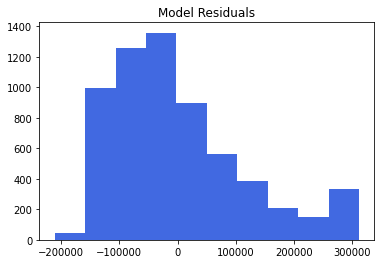

In [67]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

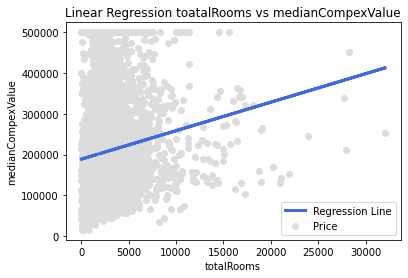

medianCompexValue coefficient:7.0
Mean squared error: 1.303e+10
Root Mean squared error: 1.141e+05
R2 score: 0.02


In [68]:
# Plot outputs
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression toatalRooms vs medianCompexValue")
plt.xlabel("totalRooms")
plt.ylabel("medianCompexValue")
plt.legend()
plt.show()

# The coefficients
print('medianCompexValue coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

In [69]:
# multiple linear regression in sklearn
X = price_data[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr']]
Y = price_data[['medianCompexValue']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=50)

# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression()

In [70]:
# Get multiple predictions.
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[206754.52361907],
       [208268.72343399],
       [202992.44223681],
       [209669.29049829],
       [192338.02594179]])

In [71]:
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.1e+10
MAE 8.17e+04
RMSE 1.05e+05


In [72]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.17


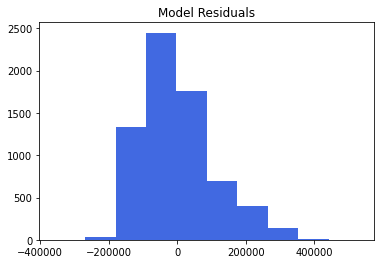

In [73]:
# Grab the residuals & then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show()

In [74]:
# multiple linear regression in sklearn
X = price_data[['column1','column2','complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr','column8']]
Y = price_data[['medianCompexValue']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=50)

# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_predict = regression_model.predict(X_test)
model_mset = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_maet = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

MSE 1.1e+10
MAE 8.17e+04
RMSE 1.05e+05
R2: 0.63
